<a href="https://colab.research.google.com/github/weso500/IOT-Anomaly-Detection/blob/main/PCA_Second_Level_Learner_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
x_train_raw = pd.read_csv('/content/Total_Train_Latent.csv' )
for column in x_train_raw.columns:
    x_train_raw[column] = x_train_raw[column]  / x_train_raw[column].abs().max()
x_train = x_train_raw.fillna(0)

In [260]:
display(x_train)

,A+_IGBT-IMSE,A+_IGBT-IKL Loss,A+_IGBT-IZmean1,A+_IGBT-IZmean2,A+_IGBT-IZmean3,A+_IGBT-IZlogvar1,A+_IGBT-IZlogvar2,A+_IGBT-IZlogvar3,A+IGBT-IMSE,A+IGBT-IKL Loss,...,MOD-IZlogvar2,MOD-IZlogvar3,MOD-VMSE,MOD-VKL Loss,MOD-VZmean1,MOD-VZmean2,MOD-VZmean3,MOD-VZlogvar1,MOD-VZlogvar2,MOD-VZlogvar3
0,0.118308,0.526938,0.657051,-0.787024,-0.705008,-0.823051,-0.877036,-0.817427,0.313009,0.757692,...,-0.921066,-0.809835,0.368450,0.995889,0.997568,0.996779,-0.995779,-0.963289,-0.998530,-0.997800
1,0.122441,0.494514,0.631084,-0.600865,-0.819254,-0.978935,-0.984073,-0.735822,0.315422,0.746683,...,-0.806573,-0.575999,0.551121,0.957138,0.982323,0.978435,-0.964438,-0.975255,-0.984293,-0.982044
2,0.118328,0.526626,0.656750,-0.791615,-0.700137,-0.815049,-0.872162,-0.817597,0.313537,0.754595,...,-0.790803,-0.544967,0.337159,0.993194,0.995577,0.994037,-0.997196,-0.954145,-0.997167,-0.995198
3,0.116758,0.522777,0.651386,-0.785675,-0.703454,-0.823877,-0.873696,-0.812341,0.329727,0.738100,...,-0.792883,-0.550967,0.299316,0.989591,0.993865,0.993605,-0.993280,-0.958821,-0.994444,-0.994514
4,0.129668,0.489947,0.623321,-0.587874,-0.826148,-0.992870,-0.988430,-0.724765,0.314367,0.749486,...,-0.987335,-0.960384,0.306930,0.998438,0.997984,0.998612,-0.997915,-0.964053,-0.998423,-0.998998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.118546,0.525464,0.655843,-0.785896,-0.704266,-0.822081,-0.876965,-0.815801,0.310385,0.751609,...,-0.809352,-0.588825,0.345195,0.995856,0.997128,0.995625,-0.997916,-0.957518,-0.998742,-0.996806
496,0.182322,0.531614,0.600041,-0.936023,-0.602539,-0.733019,-0.748860,-0.810013,0.339714,0.764547,...,-0.959519,-0.877369,0.654950,0.987802,0.994286,0.995446,-0.986617,-0.972767,-0.992943,-0.995759
497,0.123847,0.500325,0.636398,-0.621424,-0.811216,-0.968664,-0.978414,-0.746056,0.327182,0.761397,...,-0.802793,-0.552596,0.288269,0.991851,0.994617,0.994938,-0.994955,-0.958763,-0.995068,-0.995596
498,0.122867,0.520733,0.648813,-0.785904,-0.701679,-0.821366,-0.873971,-0.805804,0.307339,0.767547,...,-0.950462,-0.864682,0.292067,0.993523,0.995452,0.995588,-0.996075,-0.959228,-0.996112,-0.996309


In [261]:
x_test_norm_raw = pd.read_csv('/content/Total_Test_Latent_Normal.csv')
for column in x_test_norm_raw.columns:
    x_test_norm_raw[column] = x_test_norm_raw[column]  / x_test_norm_raw[column].abs().max()
x_test = x_test_norm_raw.fillna(0)

In [262]:
display(x_test)

,A+_IGBT-IMSE,A+_IGBT-IKL Loss,A+_IGBT-IZmean1,A+_IGBT-IZmean2,A+_IGBT-IZmean3,A+_IGBT-IZlogvar1,A+_IGBT-IZlogvar2,A+_IGBT-IZlogvar3,A+IGBT-IMSE,A+IGBT-IKL Loss,...,MOD-IZlogvar2,MOD-IZlogvar3,MOD-VMSE,MOD-VKL Loss,MOD-VZmean1,MOD-VZmean2,MOD-VZmean3,MOD-VZlogvar1,MOD-VZlogvar2,MOD-VZlogvar3
0,0.346916,0.922092,0.987581,-0.907251,-0.981306,-0.964243,-0.973886,-0.991087,0.571974,0.924330,...,-0.982609,-0.971121,0.515828,0.978213,0.993037,0.989299,-0.980066,-0.970973,-0.994901,-0.991321
1,0.360085,0.933117,0.997371,-0.908758,-0.991828,-0.973793,-0.981592,-0.995985,0.569132,0.935014,...,-0.977752,-0.960832,0.534865,0.977521,0.992552,0.988852,-0.980101,-0.969234,-0.994216,-0.990858
2,0.353297,0.897084,0.952451,-0.911935,-0.953106,-0.944082,-0.950556,-0.974851,0.530627,0.900450,...,-0.988203,-0.974330,0.493643,0.972199,0.989409,0.985601,-0.978293,-0.966640,-0.993099,-0.987657
3,0.364011,0.913564,0.965988,-0.920914,-0.956441,-0.942642,-0.949996,-0.982218,0.542732,0.932872,...,-0.983861,-0.966926,0.525519,0.975105,0.991452,0.988108,-0.977533,-0.974397,-0.994823,-0.989682
4,0.352908,0.918281,0.976339,-0.918344,-0.961464,-0.941544,-0.954468,-0.988625,0.538563,0.912134,...,-0.982822,-0.971694,0.478282,0.973622,0.989102,0.986094,-0.981422,-0.960109,-0.992199,-0.987747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.364680,0.919323,0.975454,-0.919192,-0.962910,-0.946561,-0.953352,-0.988397,0.519105,0.938918,...,-0.983934,-0.966955,0.477043,0.977406,0.991085,0.988189,-0.983221,-0.962287,-0.993855,-0.989741
186,0.371583,0.915576,0.969163,-0.919047,-0.961609,-0.948306,-0.953448,-0.983991,0.557916,0.917284,...,-0.990054,-0.977517,0.533537,0.967518,0.987327,0.983093,-0.975244,-0.966017,-0.991483,-0.985420
187,0.346193,0.909414,0.965831,-0.915562,-0.958872,-0.944611,-0.953120,-0.981998,0.532995,0.911080,...,-0.992552,-0.979852,0.502050,0.970622,0.988671,0.984676,-0.977475,-0.965611,-0.992431,-0.986800
188,0.339175,0.900580,0.962338,-0.904636,-0.965951,-0.955917,-0.964857,-0.978308,0.524478,0.914139,...,-0.997834,-0.993245,0.514194,0.966244,0.986688,0.982354,-0.974608,-0.965382,-0.991066,-0.984717


In [263]:
x_test_anom_raw = pd.read_csv('/content/Total_Test_Latent_Anomaly.csv')
for column in x_test_anom_raw.columns:
    x_test_anom_raw[column] = x_test_anom_raw[column]  / x_test_anom_raw[column].abs().max()
x_test_anom = x_test_anom_raw.fillna(0)

In [264]:
x_test_anom = x_test_anom.iloc[:10]
display(x_test_anom)

,A+_IGBT-IMSE,A+_IGBT-IKL Loss,A+_IGBT-IZmean1,A+_IGBT-IZmean2,A+_IGBT-IZmean3,A+_IGBT-IZlogvar1,A+_IGBT-IZlogvar2,A+_IGBT-IZlogvar3,A+IGBT-IMSE,A+IGBT-IKL Loss,...,MOD-IZlogvar2,MOD-IZlogvar3,MOD-VMSE,MOD-VKL Loss,MOD-VZmean1,MOD-VZmean2,MOD-VZmean3,MOD-VZlogvar1,MOD-VZlogvar2,MOD-VZlogvar3
0,0.710480,0.228150,0.112316,-0.513700,-0.638339,-0.781110,-0.561779,-0.307250,0.440183,0.500145,...,-0.887194,-0.696618,0.485644,0.561297,0.789806,-0.241780,-0.142236,-0.688036,-0.686095,-0.544345
1,0.241189,0.461866,0.548679,-0.756073,-0.706184,-0.838164,-0.785290,-0.689069,0.216000,0.682413,...,-0.916037,-0.766966,0.021874,0.561024,0.564361,0.859957,-0.877163,-0.571605,-0.466162,-0.510527
2,0.493941,0.287749,0.311669,-0.609291,-0.623978,-0.746757,-0.645739,-0.471285,0.520322,0.539203,...,-0.893296,-0.692991,0.889386,0.910421,0.958306,-0.664678,0.302295,-0.942593,-0.950947,-0.954791
3,0.052556,0.570124,0.683508,-0.657429,-0.868783,-0.986420,-0.989448,-0.773445,0.024644,0.975279,...,-0.932251,-0.507052,0.002012,0.643333,0.562489,0.998916,-0.998565,-0.527739,-0.441930,-0.547143
4,0.830924,0.479033,0.651040,-0.711489,-0.694507,-0.730372,-0.686474,-0.723607,0.957513,0.500499,...,-0.555768,-0.987249,0.729244,0.718055,0.884527,-0.410417,0.045900,-0.798591,-0.783298,-0.748995
5,0.467714,0.299339,0.339079,-0.628909,-0.617896,-0.743061,-0.654650,-0.492436,0.407671,0.548878,...,-0.826402,-0.616810,0.826779,0.842302,0.938033,-0.567450,0.200769,-0.893779,-0.890020,-0.882306
6,0.053030,0.558328,0.670418,-0.644134,-0.868567,-0.988446,-0.988162,-0.758528,0.023395,0.984753,...,-0.930426,-0.501188,0.002106,0.643401,0.562651,0.998757,-0.998481,-0.527900,-0.442292,-0.546895
7,0.839008,0.204319,0.023191,-0.480610,-0.619763,-0.767534,-0.489577,-0.229153,0.486720,0.506622,...,-0.863200,-0.680957,0.557037,0.597043,0.813169,-0.290443,-0.084305,-0.723763,-0.699974,-0.600892
8,0.054009,0.545251,0.657316,-0.637047,-0.862024,-0.979275,-0.977414,-0.745973,0.023102,0.980358,...,-0.929014,-0.518651,0.002057,0.642105,0.561840,0.997261,-0.998806,-0.525163,-0.441661,-0.546035
9,0.525025,0.337179,0.437853,-0.660380,-0.609394,-0.729250,-0.676124,-0.571024,0.505999,0.523820,...,-0.797949,-0.605003,0.628532,0.647849,0.845790,-0.331871,-0.037903,-0.759692,-0.734913,-0.654326


In [265]:
from sklearn.decomposition import PCA

def pca_train(train_sample_df, n_components):
    # PCA model
    train_pca = PCA(n_components)

    # Fit the PCA model on the training data and transform the same to get the reduced dimensioned data.
    train_df_pca_transf = train_pca.fit_transform(train_sample_df)
    # Reconstruct the original features from reduced dimensions.
    train_df_pca_reverse = train_pca.inverse_transform(train_df_pca_transf)
    return (train_pca)

In [267]:
TrainedPCA = pca_train(x_train, n_components=None)

In [268]:
def df_mae_loss_score(originalDF, reconstDF):

    mae_err_matrix = np.abs((np.array(originalDF) - np.array(reconstDF)))
    row_loss = np.sum(mae_err_matrix, axis=1)
    col_loss = np.sum(mae_err_matrix, axis=0)
    return (row_loss)

In [269]:
Normal = []
Y = []
for i in range(x_test.shape[0]):
  row = x_test.iloc[[i]]
  encoded = TrainedPCA.transform(row)
  decoded = TrainedPCA.inverse_transform(encoded)
  print(df_mae_loss_score(row, decoded))
  Normal.append(df_mae_loss_score(row, decoded))
  Y.append(0)

[3.27099459e-14]
[2.53963517e-14]
[2.72767919e-14]
[2.76029199e-14]
[2.38004061e-14]
[2.56600297e-14]
[3.08295056e-14]
[2.53408405e-14]
[3.04409276e-14]
[3.22103455e-14]
[3.06699111e-14]
[3.00454106e-14]
[2.6423308e-14]
[3.01234732e-14]
[2.33771336e-14]
[2.5701663e-14]
[3.27515792e-14]
[3.16413562e-14]
[2.95319325e-14]
[2.57849297e-14]
[2.841824e-14]
[3.00592884e-14]
[2.92196822e-14]
[2.69237757e-14]
[2.81788481e-14]
[2.93792768e-14]
[2.79498646e-14]
[2.71727085e-14]
[2.76931256e-14]
[2.70616862e-14]
[2.8449465e-14]
[2.50632848e-14]
[2.62567745e-14]
[2.57849297e-14]
[2.92266211e-14]
[2.56739074e-14]
[2.89906987e-14]
[2.9559688e-14]
[2.98303049e-14]
[2.67841305e-14]
[2.58681965e-14]
[2.72559753e-14]
[2.53408405e-14]
[2.92543767e-14]
[2.8449465e-14]
[2.95666269e-14]
[2.70616862e-14]
[2.94556046e-14]
[2.66731082e-14]
[2.8540538e-14]
[2.772782e-14]
[3.24115734e-14]
[2.85327317e-14]
[2.9629077e-14]
[3.23213678e-14]
[3.16136006e-14]
[2.79776202e-14]
[2.73045475e-14]
[3.0281333e-14]
[2.742250

In [270]:
Anomaly = []
for i in range(x_test_anom.shape[0]):
  row = x_test_anom.iloc[[i]]
  encoded = TrainedPCA.transform(row)
  decoded = TrainedPCA.inverse_transform(encoded)
  print(df_mae_loss_score(row, decoded))
  Anomaly.append(df_mae_loss_score(row, decoded))
  Y.append(1)

[5.42812323e-14]
[3.83755527e-14]
[5.39793904e-14]
[3.44004339e-14]
[5.96883654e-14]
[4.65599781e-14]
[3.55397135e-14]
[5.52457385e-14]
[3.38175668e-14]
[4.92193092e-14]


In [271]:
Fulloutput = np.concatenate([Normal, Anomaly])
print(Fulloutput.shape)

(200, 1)


[           inf 5.96883654e-14 3.83755527e-14 3.57908148e-14
 3.55397135e-14 3.46112028e-14 3.38175668e-14 3.04272666e-14
 3.03923553e-14 2.98545910e-14 2.98511216e-14 2.94556046e-14
 2.93792768e-14 2.90323321e-14 2.89906987e-14 2.84910984e-14
 2.84494650e-14 2.79498646e-14 2.78388423e-14 2.76931256e-14
 2.76723089e-14 2.74225087e-14 2.73392420e-14 2.71727085e-14
 2.70616862e-14 2.67841305e-14 2.67286193e-14 2.67078026e-14
 2.67008637e-14 2.59514632e-14 2.58681965e-14 2.58404409e-14
 2.57849297e-14 2.56947241e-14 2.56739074e-14 2.55073740e-14
 2.53408405e-14 2.32036612e-14]
0.9942105263157895


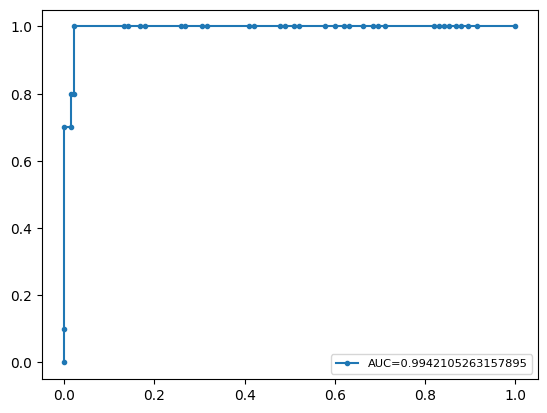

In [272]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(Y, Fulloutput , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

In [273]:
loss_threshold = np.percentile(Fulloutput, 95)
print(loss_threshold)

3.555226859436322e-14


In [274]:
for i in range(len(Fulloutput)):
  if Fulloutput[i] > loss_threshold:
    Fulloutput[i] = 1
  else:
    Fulloutput[i] = 0

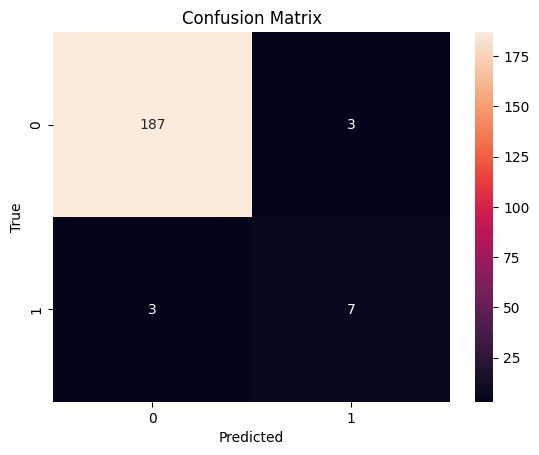

In [275]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Fulloutput)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()